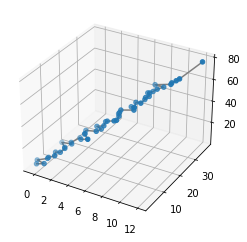

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

X = np.linspace(0,10,49)
Y =3 * X + 2
Z =2 * Y + 1
X += np.random.normal(size=(X.shape)) * 0.4 #添加噪声
Y += np.random.normal(size=(Y.shape)) * 0.4 #添加噪声
Z += np.random.normal(size=(Z.shape)) * 0.4 #添加噪声
X= np.append(X, [12])
Y= np.append(Y, [37.6])
Z= np.append(Z, [77.2])
data = np.c_[X, Y, Z]

ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z, 'gray')
ax.scatter3D(X, Y, Z, 'gray')
plt.show()

In [67]:
data = data - np.mean(data, axis=0, keepdims=True)
xTx = data.T.dot(data)
eig_vals, eig_vecs = np.linalg.eig(xTx)
print(eig_vals)
print(eig_vecs)
print(eig_vecs.dot(np.diag(eig_vals)).dot(eig_vecs.T) - xTx)

[2.18593900e+04 5.85914362e+00 7.59324313e+00]
[[ 0.14955344 -0.9255521  -0.34783198]
 [ 0.44132913 -0.2523148   0.86114217]
 [ 0.8847951   0.28229516 -0.37073855]]
[[-6.82121026e-13  3.18323146e-12  9.09494702e-13]
 [ 3.18323146e-12  8.18545232e-12  7.27595761e-12]
 [ 9.09494702e-13  7.27595761e-12  0.00000000e+00]]


In [68]:
sorted_indice=np.argsort(-1*eig_vals) # 排序
eig_vals=eig_vals[sorted_indice]
eig_vecs[:]=eig_vecs[:,sorted_indice]

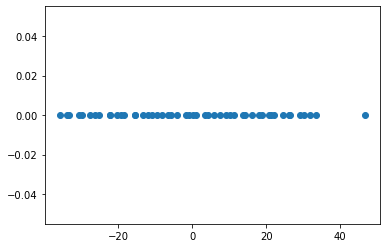

In [69]:
reduced_data = data.dot(eig_vecs[:,0].T)  # 只取第一个主成分（降至一维）
plt.scatter(reduced_data, np.zeros(50))
plt.show()